In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from itertools import cycle
from sklearn.metrics import pairwise_distances

%matplotlib inline

In [2]:
df = pd.DataFrame()
df = pd.read_csv('2014_results.csv')

# styling so I can see all the columns
pd.set_option('display.max_columns',21)
plt.style.use('bmh')
from IPython.display import display

In [3]:
df

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,116.37,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,70.23,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,107.47,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,67.83,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


# Data Cleaning

In [4]:
df.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [5]:
df = df.drop(['ctz', 'state'], axis=1)

In [6]:
df=df.dropna()

# K-Means

In [7]:
df.columns
df.replace('-', '0.0', inplace=True)

In [8]:
df=df.dropna(axis=0)

In [9]:
df[df['10k'].str.contains('0.0')]

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,30k,5k,half,20k,country,city,40k
309,40.02,"Uthmeier, James W.",997,99.98,M,26,174.05,294,1285,141.00,1359,6.65,120.23,20.08,84.40,80.10,USA,Washington,163.78
554,40.03,"Hartnett, Michael",547,99.60,M,31,166.88,578,663,139.17,701,6.37,119.57,20.28,84.27,79.95,USA,Minneapolis,158.50
804,40.03,"Schnaitter, Karl W.",637,99.47,M,31,168.48,857,781,139.30,826,6.43,119.52,19.78,84.17,79.82,USA,Mountain View,159.38
983,40.00,"England, Stephen",698,98.23,M,34,169.35,1077,860,138.45,906,6.47,118.13,20.08,83.20,78.98,USA,New York,159.72
984,40.03,"Herz, Michael R.",2776,103.50,M,26,196.40,1078,4895,155.65,5569,7.50,128.88,19.80,86.62,82.02,USA,San Francisco,184.57
1093,40.07,"Daly, Michael",742,100.48,M,38,170.03,1212,914,140.93,963,6.50,120.95,19.77,84.80,80.47,USA,San Diego,161.38
1153,40.08,"Sanchez, Samuel R.",1454,102.55,M,32,178.88,1286,1996,146.07,2112,6.83,124.05,20.17,86.07,81.52,USA,Santa Fe,168.90
1225,40.08,"Wall, Scott C",2089,101.07,M,28,185.78,1367,3115,147.10,3354,7.10,122.78,20.15,84.93,80.45,USA,Portland,175.15
1228,40.03,"Bechtel, Adam",921,100.53,M,39,173.03,1371,1175,142.87,1241,6.60,121.53,20.17,84.70,80.27,USA,Woodside,163.85
1250,40.00,"Ibarra-Espinoza, Armando",3986,119.08,M,26,236.43,1394,10735,188.67,17131,9.03,151.52,19.77,100.47,91.67,USA,Arcata,225.65


In [10]:
df_numerical = df[['10k', 'division', '25k', 'age', 'official', 'genderdiv', '35k', 'overall', 'pace', '30k', '5k', 'half', '20k', '40k']]

In [11]:
df_numerical = df_numerical.astype(float)

In [104]:
df_numerical.official.median()

232.33

In [105]:
df_numerical = df_numerical[df_numerical['10k']>0.0]
# define features
X = df_numerical.loc[:, ~df_numerical.columns.isin(['official'])]
Y = df_numerical['official']

# X = X.replace(to_replace='-', value=0)
# binerize
Y = np.where(Y > 232.33, 0, 1)

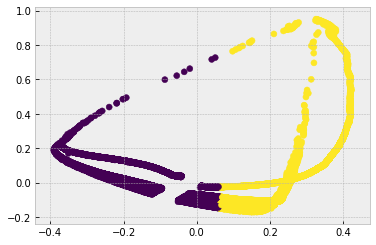

Comparing k-means clusters against the data:
col_0      0
row_0       
0      22227
1       9706


In [13]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, Y))

# Mini Batch

In [14]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0      0     1
row_0             
0          2  8841
1      22225   865


# Mean Shift

In [15]:
#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.9,
    random_state=42)

In [16]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


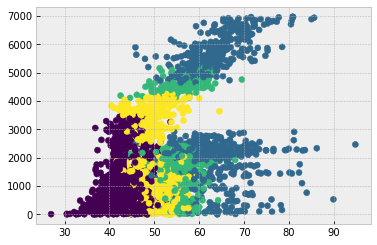

Comparing the assigned categories to the ones in the data:
col_0     0    1    2    3
row_0                     
0      1162  773  487  771


In [17]:
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

# Spectral Clustering

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


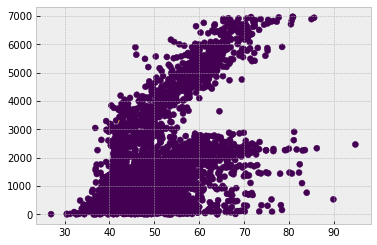

Comparing the assigned categories to the ones in the data:
col_0     0  1  2  3
row_0               
0      3187  2  2  2


In [18]:
# We know we're looking for three clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [27]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation(damping=0.7).fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 41


In [58]:
X_train_m = X_train.values

0
36
1
50
2
73
3
148
4
196
5
278
6
331
7
534
8
707
9
830
10
975
11
1054
12
1090
13
1109
14
1223
15
1304
16
1328
17
1354
18
1485
19
1512
20
1634
21
1771
22
1802
23
1822
24
1865
25
1935
26
2020
27
2057
28
2165
29
2280
30
2307
31
2316
32
2335
33
2627
34
2678
35
2690
36
2736
37
2935
38
2961
39
3141
40
3162


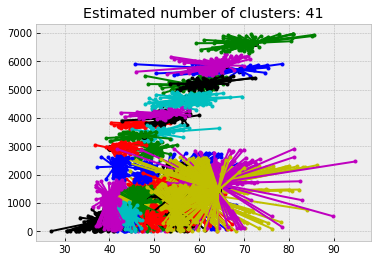

In [59]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    print(k)
    print(cluster_centers_indices[k])
    class_members = labels == k
    cluster_center = X_train_m[cluster_centers_indices[k]]
    plt.plot(X_train_m[class_members, 0], X_train_m[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train_m[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# Consistency

In [84]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

X4 = X4[0:len(X3), :]
X_pca4 = X_pca4[0:len(X3), :]

In [86]:
X4.shape

(7983, 13)

In [82]:
en = enumerate([(X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)])
en

In [80]:
ypred
print(X_pca4.shape)

(7984, 2)


In [91]:
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
 # Put the features into ypred.
    print(len(data))
    print(data[1].shape)
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    print('Hi')
    
# Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

2
(7983, 2)
Hi
2
(7983, 2)
Hi
2
(7983, 2)
Hi
2
(7983, 2)
Hi


In [92]:
ypred.columns

Index(['pca_f1_sample0', 'pca_f2_sample0', 'pca_f1_sample1', 'pca_f2_sample1',
       'pca_f1_sample2', 'pca_f2_sample2', 'pca_f1_sample3', 'pca_f2_sample3',
       'clust2_sample3', 'clust3_sample3', 'clust4_sample3', 'clust2_sample0',
       'clust3_sample0', 'clust4_sample0', 'clust2_sample1', 'clust3_sample1',
       'clust4_sample1', 'clust2_sample2', 'clust3_sample2', 'clust4_sample2'],
      dtype='object')

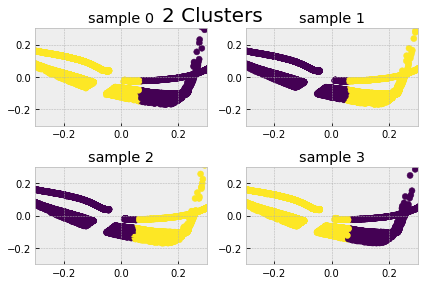

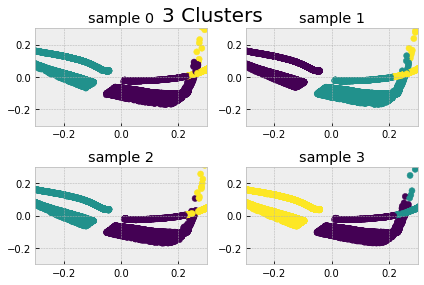

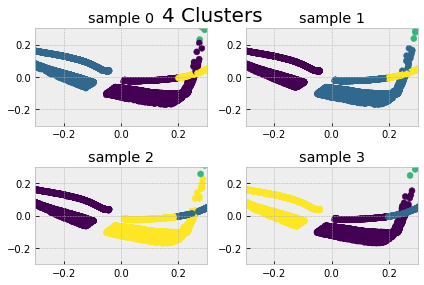

In [93]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [106]:
# Get predicted clusters.
full_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_norm)

pd.crosstab(Y, full_pred) 

col_0,0,1
row_0,,
0,15752,213
1,6320,9648


# Contingency Table

In [107]:
print(np.unique(Y))
print(np.unique(full_pred))

[0 1]
[0 1]


In [108]:
# Note: the itertools module is tons of fun and very useful.
import itertools

# Create a list of pairs, where each pair is the ground truth group
# and the assigned cluster.
c = list(itertools.product(Y, full_pred))

# Count how often each type of pair (a, b, c, or d) appears.
RIcounts = [[x, c.count(x)] for x in set(c)]
print(RIcounts)

# Create the same counts but without the label, for easier math below.
RIcounts_nolabel = [c.count(x) for x in set(c)]

# Calculate the Rand Index.
RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
print(RIscore)

MemoryError: 

# Adjusted Rand Index

In [109]:
metrics.adjusted_rand_score(Y, full_pred)

0.349063631480214

# Similarity: Silhouette coefficient

In [110]:
for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

MemoryError: 